<h1> 🚔 🏙 Analyzing Car Accidents in New York City <h1> 

In this journal, we will be analyzing the number of accidents on the roads in the city of New York. For all the reported accidents, the [City of New York have collected](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95) details for each accident and have been maintaining records for the past few years. For the purpose of this example, we'll be analyzing the data from January 2018 to August 2019.

We will identify patterns in accidents, which would help them take preventive actions to reduce the number of accidents in the future. We will also be examining certain parameters like borough, time of day, reason for accident, etc.

These are the questions that we will be visiting:
1. How have the number of accidents fluctuated over the past year and a half? Have they increased over that time?
2. For any particular day, during which hours are accidents most likely to occur?
3. Are there more accidents on weekdays than weekends?
4. What are the accidents' count-to-area ratio per borough? Which boroughs have disproportionately large numbers of accidents for their size?
5. For each borough, during which hours are accidents most likely to occur?
6. What are the top 5 causes of accidents in the city? 
7. What types of vehicles are most involved in accidents per borough?
8. What types of vehicles are most involved in deaths?

**<h4> How have the number of accidents fluctuated over the past year and a half? Have they increased over that time? <h4>**

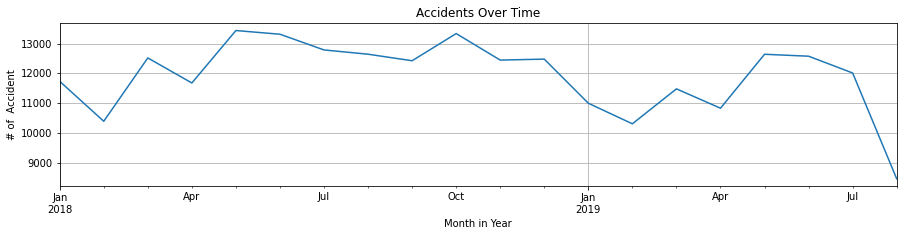

In [ ]:
#@title
#importing libraries and data
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64

with open('/content/borough_data.json') as f:
    borough_data=json.load(f)

with open('/content/accidents (1).csv') as f:
    df=pd.read_csv(f, delimiter=';')


def m_a(df):
    #new column w/ year and month
    df['YEAR_MONTH'] = pd.to_datetime(df['DATE']).dt.to_period('M')

    #group by month
    monthly_accidents = df.groupby('YEAR_MONTH').size()
    
    return monthly_accidents

#create line graph for monthly accidents
m_a(df).plot.line(title = "Accidents Over Time",
                   xlabel = "Month in Year",
                   ylabel = "# of  Accident",
                   grid = True,
                   figsize=(15, 3))

The line graph above shows that the number of accidents has mildly decreased, but is overall stable. There was a steady drop in accidents between December of 2018 and February of 2019, then continued to rise afterwards, but not as dramatically as the previous year. The drop in these months can be attributed to bad weather and snow conditions, many citizens may feel less confident in drying in ice roads and feel safer using public transportation

It can be also suspected that the data in August 2019 is not complete, explaining the sharp decline after July 2019.

**<h4> For any particular day, during which hours are accidents most likely to occur?**

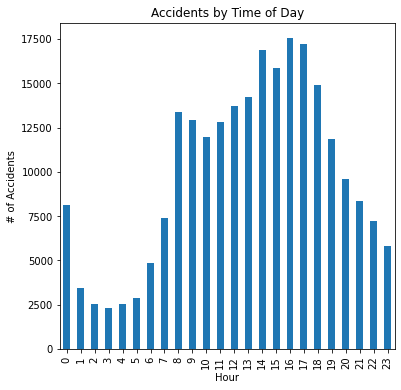

In [ ]:
#@title
def h_a(df):
    df['HOUR'] = pd.to_datetime(df['TIME']).dt.hour
    hourly_accidents = df.groupby(['HOUR']).size()

    
    return hourly_accidents

h_a(df).plot.bar(title = "Accidents by Time of Day",
                  xlabel = 'Hour',
                  ylabel = "# of Accidents",
                  figsize = (6,6))

We can observe from this bar graph that the number of accidents tends to be low during the early hours of the morning (between hour 1 and hour 7), and sharply increases between hour 7 to hour 16, where it reaches it's peak. This peak can be attributed to "rush. hour" which is the time where most people are leaving their workplace. After hour 16, the number of accidents begins to gradually decrease.

**<h4> Are there more accidents on weekdays than weekends?**

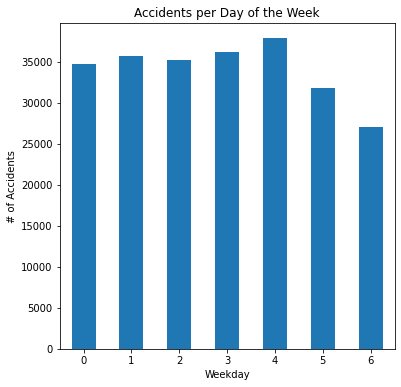

In [ ]:
#@title
def w_a(df):
    df['WEEKDAY'] = pd.to_datetime(df["DATE"]).dt.weekday
    weekday_accidents = df.groupby(["WEEKDAY"]).size()

    return weekday_accidents

#plotting
w_a(df).plot.bar(title = 'Accidents per Day of the Week',
                  xlabel = 'Weekday',
                  rot = 360,
                  ylabel = "# of Accidents",
                  figsize = (6,6))

In this bar graph 0 is Monday and 6 is Sunday.

The graph shows that the number of accident's is pretty steady throughout the week, but slightly decreases during the weekends (Saturday and Sunday). Friday has the highest number of accidents in the week. 

**<h4> What are the accidents' count-to-area ratio per borough? Which boroughs have disproportionately large numbers of accidents for their size?**

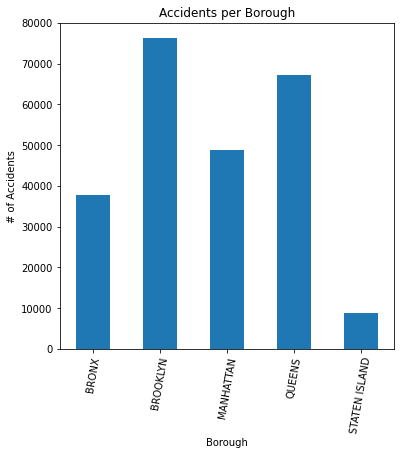

In [ ]:
#@title
def b_a(df):
    boroughs = df.groupby(['BOROUGH']).size()
    
    return boroughs
  
  #plotting
b_a(df).plot.bar(title = "Accidents per Borough",
                    xlabel = "Borough",
                    rot = 80,
                    ylabel = "# of Accidents",
                    figsize = (6,6))

To answer this question, it was important that we get a good understanding of the data that we are about to analyze. I decided to plot which boroughs tend to have the most accidents. 

In this bar graph, we are able to identify Brooklyn as having the highest number of car accidents and Staten Island as the borough with significantly less collisions.

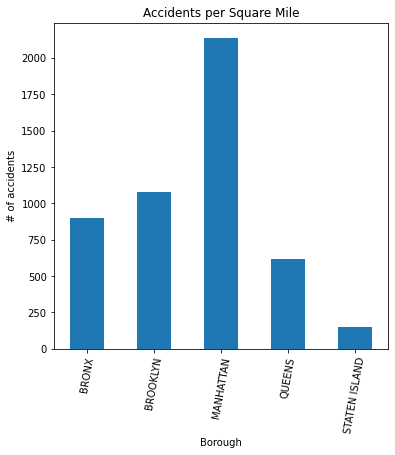

In [ ]:
#@title
def a_sqm(df, borough_data):
    boroughs = b_a(df)
    borough_frame = pd.DataFrame(boroughs).reset_index()

    # borough_dict into df
    borough_dict=[]

    for i in borough_data.items():
      borough_dict.append([i[0], i[1]])

    temp = pd.DataFrame(borough_dict, columns = ['Borough', 'b'])
    bdict_df = pd.json_normalize(json.loads(temp.to_json(orient="records")))

    # add area column for bdict_df to borough_frame

    borough_frame = borough_frame.rename(columns = {'BOROUGH' : 'borough',
                                                0: 'accidents'})
    borough_frame['area'] = bdict_df['b.area']

    # Create columns that calculates the accidents per square mile
    borough_frame['accidents_per_sq_mi'] = borough_frame['accidents'] / borough_frame['area']
 
    return borough_frame

# plotting
a_sqm(df, borough_data).plot.bar(x = 'borough',
                                  y = 'accidents_per_sq_mi',
                                  figsize = (6,6),
                                  title = 'Accidents per Square Mile',
                                  xlabel = 'Borough',
                                  rot = 80,
                                  ylabel = '# of accidents',
                                  legend = False)

Using the area information in the data dictionary, I was able to divide the number of accidents by the area of their respective borough.

The graph above demonstrated that Manhattan is the borough with the highest accidents per square mile, which Staten Island continues to be the borough significantly less accidents.

**<h4> For each borough, during which hours are accidents most likely to occur?**

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


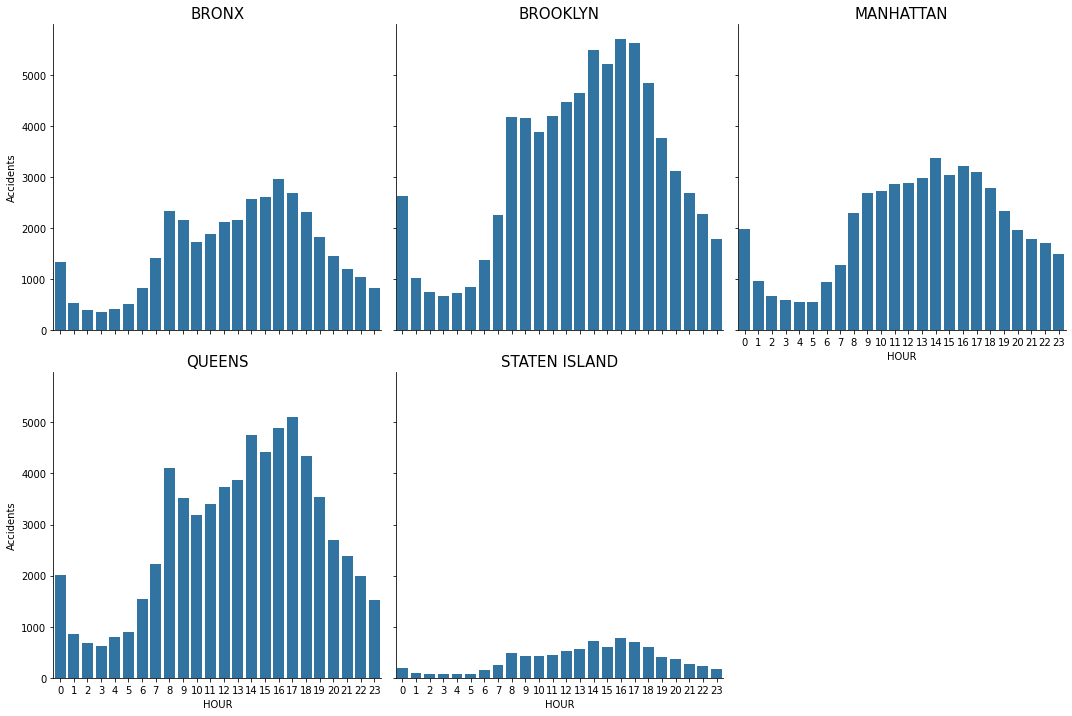

In [ ]:
#@title
def b_hr(df):
    bor_hour = df.groupby(['BOROUGH', 'HOUR']).size()
    
    return bor_hour

bor_hour_df = b_hr(df).to_frame().reset_index()
bor_hour_df = bor_hour_df.rename(columns = {0:'Accidents'})
bor_hour_df

g = sns.FacetGrid(bor_hour_df, col = 'BOROUGH', height = 5, col_wrap = 3)

g.map(sns.barplot, 'HOUR', 'Accidents')
g.set_titles(col_template = '{col_name}', size = 15);

There is a general trend in each borough, where the peak of car accidents occur during the 14th and 17th hour, and the least amount of accidents occur between 1 AM and 5 AM.

For a more specific look at which hour are more accidents to occur in each borough: 
- The Bronx has the most accidents at the 16th
- Brooklyn as the most accidents at the 16th hour
- Manhattan as the most accidents at the 14th hour
- Queens as the most accidents at the 17th hour
- Staten Island as the most accidents at the 16th hour

<h4> What are the top 5 causes of accidents in the city?

In [ ]:
#@title
def top_5(df):
    contrib_df = pd.melt(df.reset_index(), id_vars="index", value_vars=['CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']).dropna()

    contrib_df = contrib_df.drop_duplicates(subset = ['index', 'value'])

    factors_most_acc = contrib_df.groupby('value').count().sort_values(by = 'index', ascending = False).head(5)
    factors_most_acc = factors_most_acc.drop(columns="variable")
    factors_most_acc = factors_most_acc.rename(columns={'value': 'Contributing Factor', 
                                                        'index':'count'})
    
    return factors_most_acc

top_5(df)

,count
value,
Unspecified,190096
Driver Inattention/Distraction,61752
Failure to Yield Right-of-Way,19641
Following Too Closely,17293
Backing Unsafely,14835


<h4> What types of vehicles are most involved in accidents per borough?

In [ ]:
#@title
def top_veh_types(df):
    """
    Finds the 10 borough:vehicle type pairs with more accidents, without 
    double counting the vehicle types of a single accident.
    
    Arguments:
    `df`: A pandas DataFrame.
    
    Outputs:
    `vehi_most_acc`: A pandas DataFrame. It has only 10 elements, which are,
    sorted in descending order, the borough-vehicle pairs with the most accidents.
    The column with the actual numbers is named `index`
    """

    vehi_cols = ['VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5']
    
    vehi_bor_df = pd.melt(df.reset_index(), id_vars = ['index', 'BOROUGH'], value_vars= vehi_cols).dropna()
    vehi_bor_df = vehi_bor_df.drop_duplicates(subset = ['index', 'value'])
    vehi_bor_df = vehi_bor_df.drop(columns = 'variable')

    vehi_most_acc = vehi_bor_df.groupby(['BOROUGH', 'value']).count().sort_values(by='index', ascending = False).head(10)    

    vehi_most_acc = vehi_most_acc.rename(columns = {'BOROUGH':'Borough',
                                                     'value': 'Vehicle Type',
                                                     'index':'count'})
    
    return vehi_most_acc

top_veh_types(df)

,,count
BOROUGH,value,
BROOKLYN,Sedan,39459
QUEENS,Sedan,35103
BROOKLYN,Station Wagon/Sport Utility Vehicle,32262
QUEENS,Station Wagon/Sport Utility Vehicle,31647
MANHATTAN,Sedan,20727
BRONX,Sedan,19652
MANHATTAN,Station Wagon/Sport Utility Vehicle,16432
BRONX,Station Wagon/Sport Utility Vehicle,15434
BROOKLYN,PASSENGER VEHICLE,10177


<h4>What are the top causes of death in car accidents?

In [ ]:
#@title
def reason_killed(df):
  veh_type = ['CONTRIBUTING FACTOR VEHICLE 1',
        'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
        'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']

  z = pd.melt(df.reset_index(), id_vars=['index',
        'NUMBER OF PEDESTRIANS KILLED',
        'NUMBER OF CYCLIST KILLED',
        'NUMBER OF MOTORIST KILLED'], value_vars= veh_type)

  z = z.drop_duplicates(subset = ['index', 'value'])

  killed_df = z.groupby('value').sum()

  killed_df['TOTAL KILLED'] = killed_df["NUMBER OF PEDESTRIANS KILLED"] +	killed_df["NUMBER OF CYCLIST KILLED"] + killed_df["NUMBER OF MOTORIST KILLED"]

  killed_df = killed_df.drop(columns = 'index').sort_values(by = 'TOTAL KILLED', ascending = False)

  return killed_df

reason_killed(df).head(24)

,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST KILLED,TOTAL KILLED
value,,,,
Unspecified,54,18,56,128
Failure to Yield Right-of-Way,38,0,9,47
Driver Inattention/Distraction,16,8,5,29
Unsafe Speed,1,2,17,20
Traffic Control Disregarded,5,5,6,16
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,8,1,0,9
Illnes,2,0,7,9
Backing Unsafely,6,0,1,7
Lost Consciousness,0,0,6,6


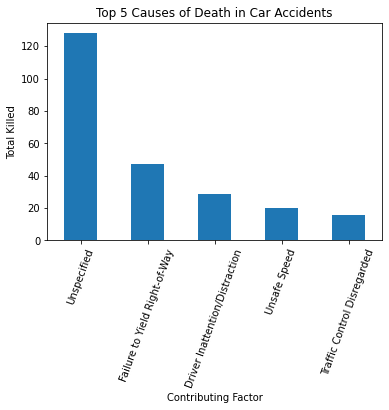

In [ ]:
#@title
def plot_top5_reason_killed(df):
  veh_type = ['CONTRIBUTING FACTOR VEHICLE 1',
        'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
        'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']

  z = pd.melt(df.reset_index(), id_vars=['index',
        'NUMBER OF PEDESTRIANS KILLED',
        'NUMBER OF CYCLIST KILLED',
        'NUMBER OF MOTORIST KILLED'], value_vars= veh_type)

  z = z.drop_duplicates(subset = ['index', 'value'])

  killed_df = z.groupby('value').sum()

  killed_df['TOTAL KILLED'] = killed_df["NUMBER OF PEDESTRIANS KILLED"] +	killed_df["NUMBER OF CYCLIST KILLED"] + killed_df["NUMBER OF MOTORIST KILLED"]

  killed_df = killed_df.drop(columns = ['index', 'NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED']).sort_values(by = 'TOTAL KILLED', ascending = False)

  killed_plot = killed_df.head(5).plot.bar(title = "Top 5 Causes of Death in Car Accidents",
                                           xlabel = "Contributing Factor",
                                           ylabel = "Total Killed",
                                           rot = 70,
                                           legend = False)
  
  return killed_plot 

plot_top5_reason_killed(df)